# Level 2
## Task 1: Regression Model for House Price Prediction

In this notebook, we will train and evaluate three regression models for predicting house prices using the Boston Housing dataset. The following models will be tested:
- **Linear Regression**
- **Decision Tree Regressor**
- **Random Forest Regressor**

We will evaluate the performance of these models based on **Mean Squared Error (MSE)** and **R-squared (R²)**. Additionally, we will visualize the model's predicted values compared to the actual values and inspect residual distributions.


In [9]:
# 📦 Imports
import os
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


### 👇 Choose or Upload a Dataset

Dropdown(description='📂 File:', index=1, options=('churn-bigml-20_cleaned.csv', 'house_prediction_cleaned.csv'…

FileUpload(value=(), accept='.csv', description='Upload')

## 📄 Dataset Preview

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.496564,-0.487068,-0.557095,0.0,-0.708070,0.252183,0.410033,0.567526,-0.818617,-0.943926,-0.316899,0.440548,-0.487823,-0.092857
1,-0.496568,-0.487068,-0.557095,0.0,-0.708070,1.501743,-0.224054,0.567526,-0.818617,-0.943926,-0.316899,0.361627,-1.278277,1.529041
2,-0.495531,-0.487068,-1.277731,0.0,-0.807684,1.195895,-0.769084,1.124906,-0.696488,-1.068054,0.105255,0.396531,-1.446886,1.368089
3,-0.488038,-0.487068,-1.277731,0.0,-0.807684,1.439592,-0.469852,1.124906,-0.696488,-1.068054,0.105255,0.440548,-1.077183,1.714754
4,-0.496045,-0.487068,-1.277731,0.0,-0.807684,0.266903,-0.309549,1.124906,-0.696488,-1.068054,0.105255,0.386641,-1.095745,0.786187


### 🧾 Dataset Info

✅ Numeric columns (14): ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
❌ Non-numeric columns (0): []
📊 Rows: 414, Columns: 14


Dropdown(description='🎯 Target:', index=13, options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',…

## 🧮 Correlation Matrix

e:\CODveda\codveda-internship\codveda-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


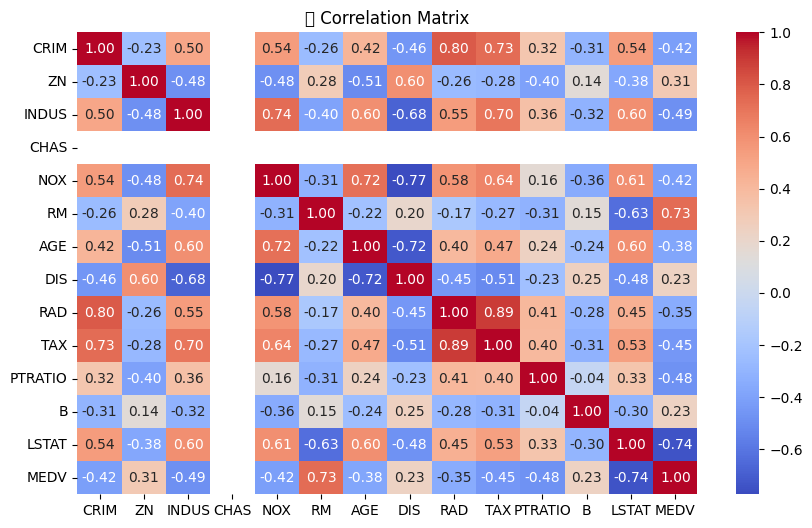

## 🤖 Regression Model Results

### ✅ Linear Regression

📉 MSE: 0.3615
📈 R² Score: 0.6765


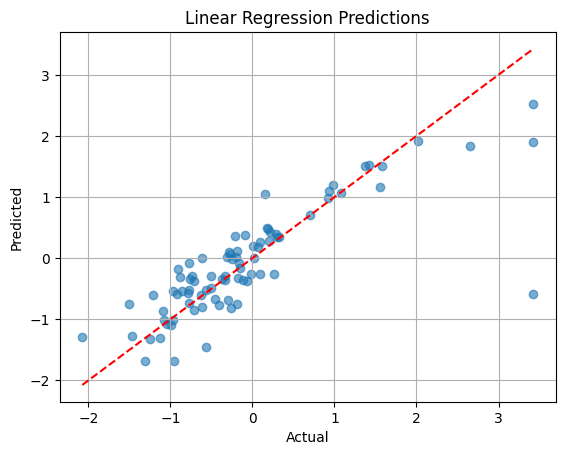

### ✅ Decision Tree

📉 MSE: 0.3770
📈 R² Score: 0.6627


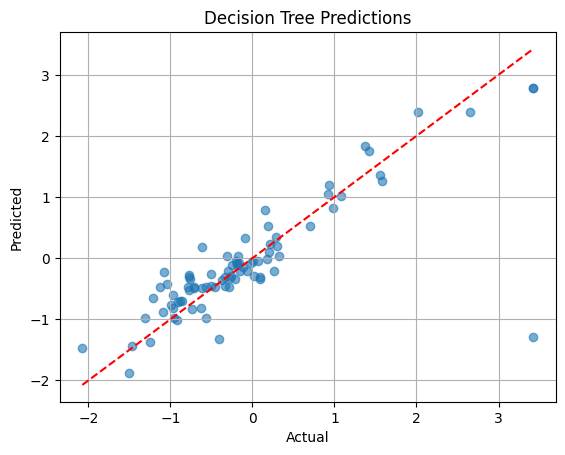

### ✅ Random Forest

📉 MSE: 0.1729
📈 R² Score: 0.8453


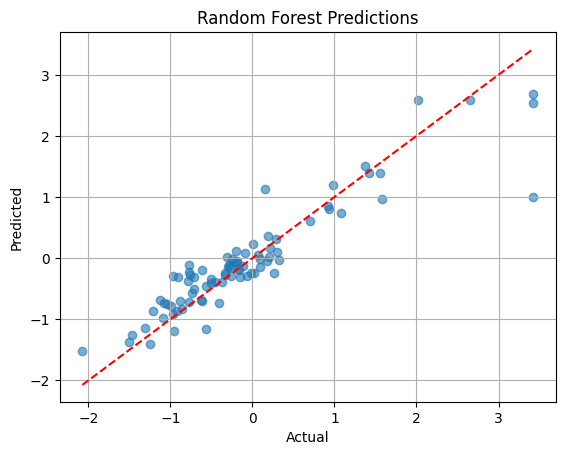

In [10]:
# --------------------📁 Paths and Defaults --------------------
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
cleaned_dir = os.path.join(root_dir, "data", "cleaned")

default_file = "house_prediction_cleaned.csv"
default_path = os.path.join(cleaned_dir, default_file)


# -------------------- Widgets --------------------
file_upload = widgets.FileUpload(accept='.csv', multiple=False)
file_path_selector = widgets.Dropdown(
    options=[f for f in os.listdir(cleaned_dir) if f.endswith(".csv")],
    value=default_file,
    description="📂 File:"
)

target_selector = widgets.Dropdown(options=[], description="🎯 Target:")
results_output = widgets.Output()


# -------------------- Load Dataset --------------------
def load_dataset(file_path=None, uploaded=None):
    try:
        if uploaded:
            return pd.read_csv(io.BytesIO(uploaded['content']))
        elif file_path:
            return pd.read_csv(file_path)
    except Exception as e:
        with results_output:
            clear_output()
            print(f"❌ Error loading dataset: {e}")
    return None

def is_regression_ready(df, target_col):
    # Check if target exists and is numeric
    return target_col in df.columns and pd.api.types.is_numeric_dtype(df[target_col])

def plot_correlation_matrix(df):
    numeric_df = df.select_dtypes(include='number')
    if numeric_df.shape[1] < 2:
        print("⚠️ Not enough numeric columns for correlation matrix.")
        return
    plt.figure(figsize=(10, 6))
    sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("🧮 Correlation Matrix")
    plt.show()

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return {"name": name, "mse": mse, "r2": r2, "predictions": preds}

def train_and_evaluate(df, target_col):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ("Linear Regression", LinearRegression()),
        ("Decision Tree", DecisionTreeRegressor(random_state=42)),
        ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ]
    
    results = [evaluate_model(name, model, X_train, X_test, y_train, y_test) for name, model in models]

    for res in results:
        display(Markdown(f"### ✅ {res['name']}"))
        print(f"📉 MSE: {res['mse']:.4f}")
        print(f"📈 R² Score: {res['r2']:.4f}")
        
        plt.figure()
        plt.scatter(y_test, res["predictions"], alpha=0.6)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title(f"{res['name']} Predictions")
        plt.grid(True)
        plt.show()

def on_file_select(change):
    selected_file = file_path_selector.value
    path = os.path.join(cleaned_dir, selected_file)
    df = load_dataset(file_path=path)
    
    if df is not None:
        run_analysis(df)

def on_file_upload(change):
    uploaded = list(file_upload.value.values())[0]
    df = load_dataset(uploaded=uploaded)
    if df is not None:
        run_analysis(df)

def print_dataset_info(df):
    numeric_cols = df.select_dtypes(include='number').columns
    non_numeric_cols = df.select_dtypes(exclude='number').columns
    display(Markdown(f"### 🧾 Dataset Info"))
    print(f"✅ Numeric columns ({len(numeric_cols)}): {list(numeric_cols)}")
    print(f"❌ Non-numeric columns ({len(non_numeric_cols)}): {list(non_numeric_cols)}")
    print(f"📊 Rows: {df.shape[0]}, Columns: {df.shape[1]}")

def run_analysis(df):
    clear_output(wait=True)
    setup_ui()

    display(Markdown("## 📄 Dataset Preview"))
    display(df.head())
    print_dataset_info(df)

    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    
    # 🛡️ Validate if dataset is usable
    if len(numeric_cols) < 2:
        display(Markdown("❌ **This dataset doesn't have enough numeric columns for regression. Please upload a different one.**"))
        return

    # 🎯 Select Target
    target_selector.options = numeric_cols
    target_selector.value = "MEDV" if "MEDV" in numeric_cols else numeric_cols[0]
    display(target_selector)

    def on_target_change(change):
        target = target_selector.value
        if is_regression_ready(df, target):
            display(Markdown("## 🧮 Correlation Matrix"))
            try:
                plot_correlation_matrix(df)
            except Exception as e:
                print(f"⚠️ Could not generate correlation matrix: {e}")

            display(Markdown("## 🤖 Regression Model Results"))
            try:
                train_and_evaluate(df, target)
            except Exception as e:
                print(f"❌ Model training failed: {e}")
        else:
            display(Markdown(f"❌ Selected column `{target}` is not valid for regression. Choose a different target."))

    target_selector.observe(on_target_change, names='value')
    on_target_change(None)

# Setup UI only once
def setup_ui():
    display(Markdown("### 👇 Choose or Upload a Dataset"))

    if os.path.exists(cleaned_dir):
        csvs = [f for f in os.listdir(cleaned_dir) if f.endswith(".csv")]
        if csvs:
            file_path_selector.options = csvs
            file_path_selector.unobserve_all()
            file_path_selector.observe(on_file_select, names='value')
            display(file_path_selector)
        else:
            print("⚠️ No .csv files found in data/cleaned/")
    else:
        print("❌ Cleaned directory does not exist.")

    file_upload.unobserve_all()
    file_upload.observe(on_file_upload, names='value')
    display(file_upload)

# Load and run utility
def try_load_and_run(df):
    if df is not None and isinstance(df, pd.DataFrame):
        run_analysis(df)
    else:
        print("⚠️ Could not load dataset.")

# Run the UI + default load
setup_ui()

# Optionally auto-run default dataset
default_df = load_dataset(file_path=default_path)
try_load_and_run(default_df)



### Conclusion

In this notebook, we trained and evaluated three regression models (Linear Regression, Decision Tree, and Random Forest) for house price prediction. The results and visualizations help us understand how well each model is performing.

- **Linear Regression** is fast and interpretable but might not capture complex relationships well.
- **Decision Tree** can model non-linear relationships but is prone to overfitting.
- **Random Forest** generally performs well due to its ensemble nature and ability to capture non-linear relationships.

Based on the performance metrics (MSE and R²) and visualizations, you can select the best model for house price prediction.